# This code illustrates the use of regression to fit a variety of models to a given dataset.

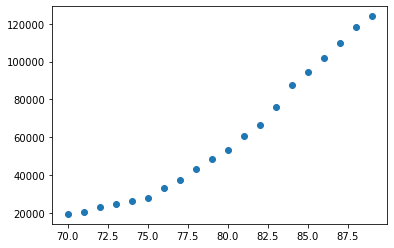

In [1]:
import matplotlib.pyplot as plt

years = range(70,90)
adData = [19550, 20700, 23210, 24980, 26620, 27900, 33300, 37440, 43330, 48780, 53550, 60430, 66580, 75850, 87820, 94750, 102140, 109650, 118050, 123930];

plt.scatter(years,adData)

# Linear Regression Model

[-401900.05263158    5809.15789474]
[[1.         0.95307039]
 [0.95307039 1.        ]]


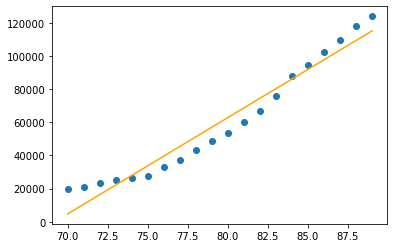

In [3]:
import statsmodels.api as sm
import numpy as np

y = adData
x = sm.add_constant(years)  # Remember this is required for the constant term when using the OLS function.
results = sm.OLS(y,x).fit()
print(results.params)

yhatLR = [results.params[0] + results.params[1]*x for x in years]
plt.scatter(years,y)
plt.plot(years,yhatLR,c='orange')

r = np.corrcoef(years,y)
print(r**2)

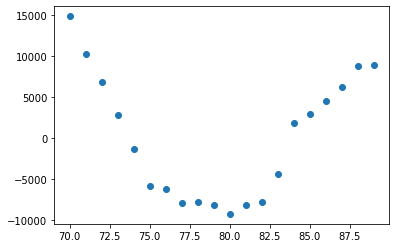

In [5]:
residual = [y - x for y,x in zip(adData,yhatLR)] 
plt.scatter(years,residual)

# Exponential Model

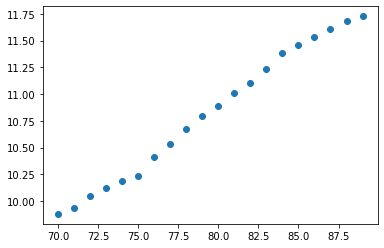

In [13]:
import math

log_y = [math.log(x) for x in adData]
plt.scatter(years, log_y)

[2.43693586 0.10548878]
[[1.         0.99349076]
 [0.99349076 1.        ]]


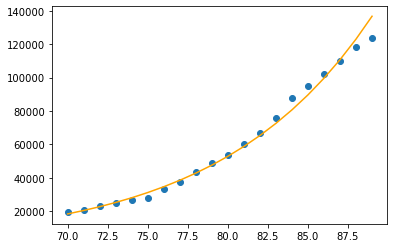

In [14]:
x = sm.add_constant(years)  # Remember this is required for the constant term when using the OLS function.
results_exp = sm.OLS(log_y,x).fit()
print(results_exp.params)

yhatExp = [math.exp(results_exp.params[0] + results_exp.params[1]*x) for x in years]
plt.scatter(years,y)
plt.plot(years,yhatExp,c='orange')

r = np.corrcoef(years,log_y)
print(r**2)

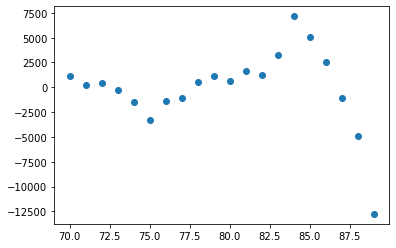

In [15]:
residual_exp = [y - x for y,x in zip(adData,yhatExp)] 
plt.scatter(years,residual_exp)

# Power Model

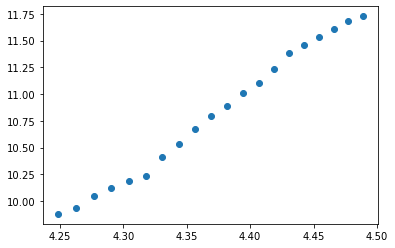

In [16]:
log_x = [math.log(x) for x in years]
plt.scatter(log_x, log_y)

[-25.70936844   8.35392398]
[[1.         0.99312091]
 [0.99312091 1.        ]]


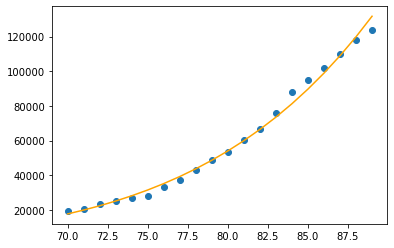

In [17]:
x = sm.add_constant(log_x)  # Remember this is required for the constant term when using the OLS function.
results_pow = sm.OLS(log_y,x).fit()
print(results_pow.params)

yhatPower = [math.exp(results_pow.params[0] + results_pow.params[1]*x) for x in log_x]
plt.scatter(years,y)
plt.plot(years,yhatPower,c='orange')

r = np.corrcoef(log_x,log_y)
print(r**2)

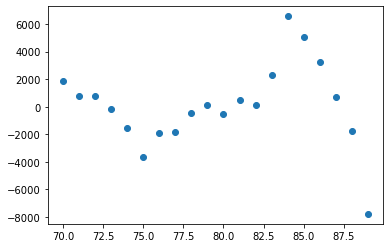

In [18]:
residual_pow = [y - x for y,x in zip(adData,yhatPower)] 
plt.scatter(years,residual_pow)

In [19]:
ressq = [x**2 for x in residual]
sum(ressq)/len(ressq)

55250977.42105266

In [20]:
resexp = [x**2 for x in residual_exp]
sum(resexp)/len(resexp)

15356766.980383288

In [21]:
respow = [x**2 for x in residual_pow]
sum(respow)/len(respow)

8836513.596275954